### **Tujuan Bisnis Data Science Sekaligus Menjadi Latar Belakang**
Cardiovascular desease (CVD) atau penyakit kardiovaskuler merupakan salah satu penyebab kematian nomor satu
secara global. Diestimasikan telah merenggut nyawa sekitar 18 juta jiwa setiap tahunnya atau 31% dari seluruh
penyebab kematian secara global. Empat dari lima kematian CVD diakibatkan oleh serangan jantung dan stroke,
dan sepertiganya dialami secara prematur oleh sesorang dengan usia di bawah 70 tahun.
Kegagalan jantung merupakan salah salah penyebab umum dari penyakit kardiovaskuler. Kita akan melakukan prediksi terhadap kemungkinan terjadinya penyakit jantung. Diharapkan pemodelan yang dihasilkan dapat membantu kinerja dokter dalam mendeteksi pasien dengan
penyakit jantung, sehingga dapat menolong lebih banyak orang yang berisiko tinggi terkena penyakit
kardiovaskuler

### **Tujuan Teknis Data Science**
Membuat model klasifikasi menggunakan decision tree dan logistic regresion, untuk memprediksi
apakah seorang pasien mengidap penyakit jantung atau tidak. Dari hasil pemodelan data, saya akan mengevaluasi kinerja model klasifikasi dan menginterpretasikan fitur-fitur mana yang paling
berpengaruh terhadap hasil prediksi fitur target.
Kinerja model diukur menggunakan metrik berikut:
*   Confusion matrix
*   Accuracy
* Precision
* Recall
* F1-score

### **Matrik Kesuksesan**
Ukuran keberhasilan pengembangan model klasifikasi: **accuracy > 70%**


### **1) Mengumpulkan Data**

In [ ]:
# Import modul yang akan digunakan
import numpy as np    # numpy untuk melakukan operasi matematika
import pandas as pd   # pandas untuk penggunakan dataframe
import matplotlib.pyplot as plt   # matplotlib untuk membuat visualisasi
%matplotlib inline
import seaborn as sns   # seaborn untuk membuat visualisasi
from sklearn.model_selection import train_test_split    # sklearn.model_selection untuk membagi data training dan testing
from sklearn import metrics   # sklearn metrics untuk evaluasi model

In [ ]:
df = pd.read_csv('heart.csv')   # karena datanya hanya satu dan sudah disediakan maka kita bisa langsung import datanya dan bisa kita read menggunakan pandas

### **2) Menelaah Data (EDA)**

#### **Data Understanding, Tipe Data, dan Seleksi Fitur Pertama**

In [ ]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45.0,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54.0,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37.0,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48.0,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


### Ingin mencari tahu informasi singkat dari data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [ ]:
var_object = df.select_dtypes(include = ['object'])
var_object.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


### Mengubah typedata dari object menjadi kategori untuk variabel yang memang sudah jelas kategorik

In [ ]:
for col in var_object.columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(2), int64(5)
memory usage: 55.5 KB


#### **Memeriksa Noise**

In [ ]:
# Statistik Deskriptif
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Dari sini kita bisa lihat secara sekilas terdapat noise di beberapa variabel

### Saya ingin mencari tahu apakah ada noise di variabel kategorik

In [ ]:
catVar = df.select_dtypes(include = ['object', 'category'])

for col in catVar.columns:
    print(col,': ', set(df[col].unique()))

Sex :  {'F', 'M', nan}
ChestPainType :  {'ASY', 'NAP', 'ATA', 'TA'}
RestingECG :  {'LVH', 'Normal', 'ST'}
ExerciseAngina :  {'Y', 'N'}
ST_Slope :  {'Flat', 'Down', 'Up'}


### **5) Membersihkan Data**

In [ ]:
mode_sex = df['Sex'].mode()[0]  # Mendapatkan modus dari kolom 'Sex'
df['Sex'].fillna(mode_sex, inplace=True)  # Mengisi missing value dengan modus

mean_age = np.round(df['Age'].mean())  # Mendapatkan rata-rata dan membulatkannya
df['Age'].fillna(mean_age, inplace=True)  # Mengisi missing value dengan rata-rata

### Data sudah tidak ada missing value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    float64 
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(2), int64(5)
memory usage: 55.5 KB


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54.0,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### **Menampilkan visualisasi**

### Bagaimana distribusi data pada variabel kategorik?
sekaligus melihat apakah memang benar ada noise

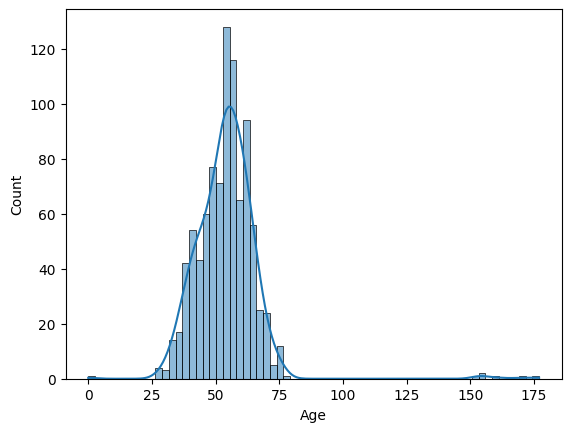

,Age
count,918.000000
mean,54.101307
std,12.938727
min,0.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,177.000000


In [ ]:
sns.histplot(data=df, x='Age', kde=True)
plt.show()
df[['Age']].describe()

### Bagaimana distribusi data dari variabel RestingBP?
Sekaligus melihat noise

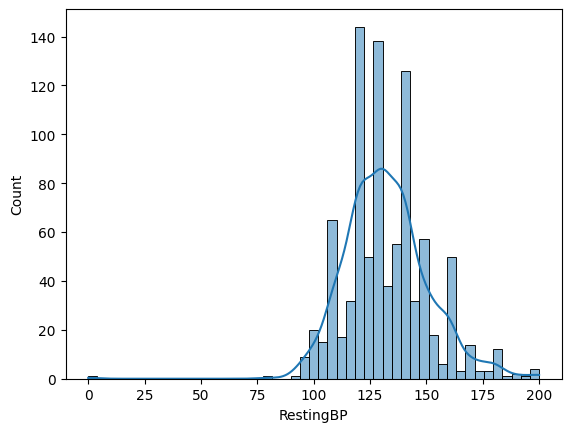

,RestingBP
count,918.000000
mean,132.396514
std,18.514154
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [ ]:
sns.histplot(data=df, x='RestingBP', kde=True)
plt.show()
df[['RestingBP']].describe()

### Bagaimana distribusi data dari variabel cholesterol?
Sekaligus melihat noise

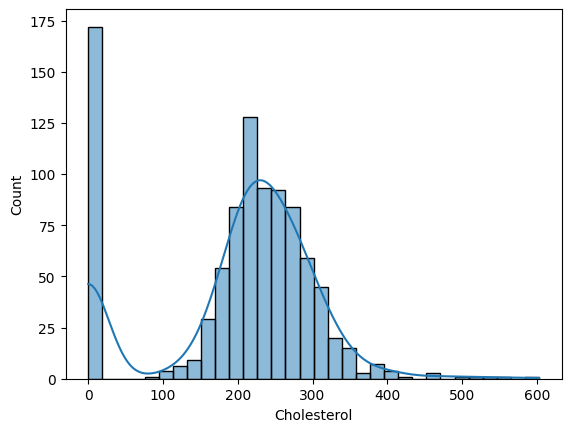

,Cholesterol
count,918.000000
mean,198.799564
std,109.384145
min,0.000000
25%,173.250000
50%,223.000000
75%,267.000000
max,603.000000


In [ ]:
sns.histplot(data=df, x='Cholesterol', kde=True)
plt.show()
df[['Cholesterol']].describe()

### Bagaimana distribusi data dari variabel MaxHR?

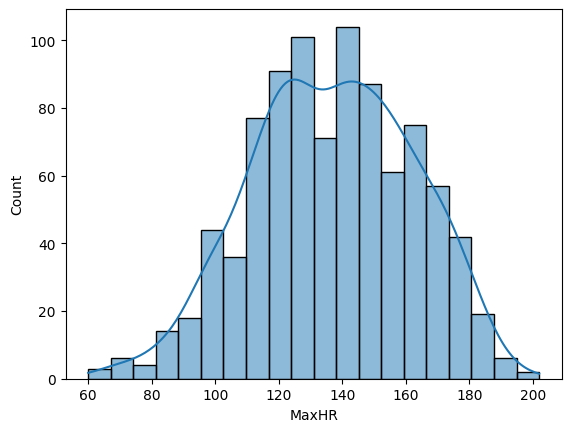

,MaxHR
count,918.000000
mean,136.809368
std,25.460334
min,60.000000
25%,120.000000
50%,138.000000
75%,156.000000
max,202.000000


In [ ]:
sns.histplot(data=df, x='MaxHR', kde=True)
plt.show()
df[['MaxHR']].describe()

### Bagaimana distribusi data dari variabel Oldpeak?

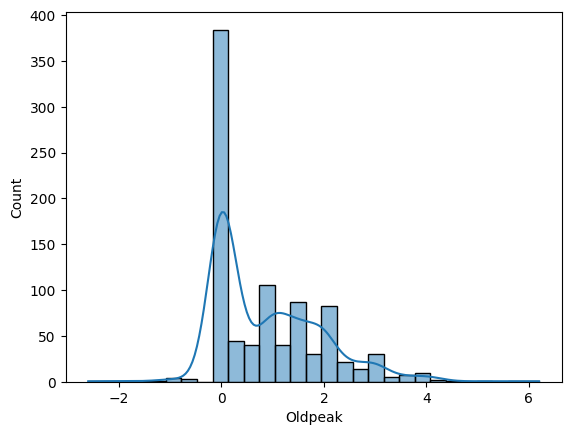

,Oldpeak
count,918.000000
mean,0.887364
std,1.066570
min,-2.600000
25%,0.000000
50%,0.600000
75%,1.500000
max,6.200000


In [ ]:
sns.histplot(data=df, x='Oldpeak', kde=True)
plt.show()
df[['Oldpeak']].describe()

### Bagaimana proporsi jenis kelamin dari data yang kita miliki?

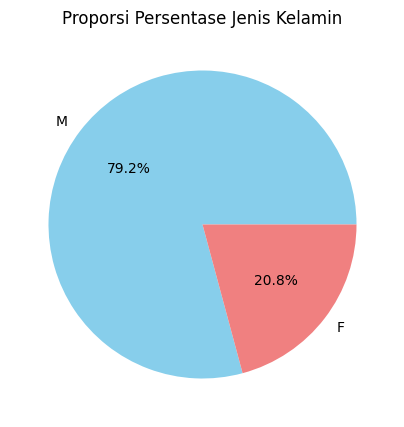

In [ ]:
gender_count = df['Sex'].value_counts()

# Membuat diagram pie untuk proporsi persentase jenis kelamin
plt.figure(figsize=(5, 5))  # Ukuran diagram pie
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proporsi Persentase Jenis Kelamin')
plt.show()

### Berapa orang yang menderita Heart Disease?

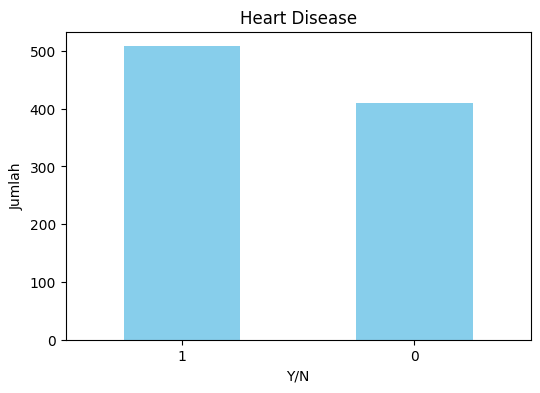

In [ ]:
# Menghitung jumlah orang berdasarkan jenis kelamin
gender_count = df['HeartDisease'].value_counts()

# Membuat diagram batang untuk jumlah orang berdasarkan heart disease
plt.figure(figsize=(6, 4))  # Ukuran diagram batang
gender_count.plot(kind='bar', color='skyblue')
plt.title('Heart Disease')
plt.xlabel('Y/N')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)  # Mengatur orientasi label sumbu x
plt.show()

#### **3) Memvalidasi Data**

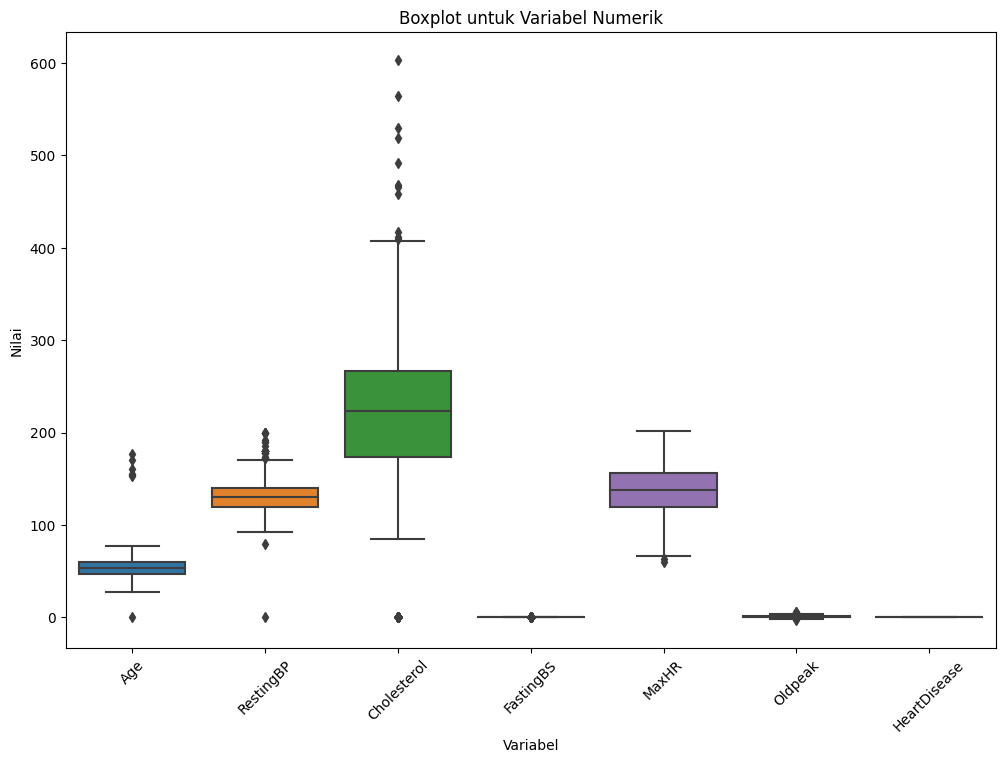

In [ ]:
# Memilih kolom-kolom numerik saja
numeric_columns = df.select_dtypes(include='number')

# Memunculkan boxplot untuk semua variabel numerik
plt.figure(figsize=(12, 8))  # Ukuran gambar boxplot
sns.boxplot(data=numeric_columns)
plt.xticks(rotation=45)  # Memutar label sumbu x untuk membaca lebih baik
plt.title('Boxplot untuk Variabel Numerik')
plt.xlabel('Variabel')
plt.ylabel('Nilai')
plt.show()

In [ ]:
# Mendefinisikan fungsi untuk menghapus pencilan berdasarkan IQR
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # Kuartil pertama
        Q3 = df[col].quantile(0.75)  # Kuartil ketiga
        IQR = Q3 - Q1  # Rentang Interquartile

        # Menghitung batas bawah dan atas untuk mengidentifikasi pencilan
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Menghapus data di luar IQR untuk variabel tertentu
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

    return data

# Menentukan kolom yang akan diproses
columns_to_process = ['Age', 'RestingBP', 'Cholesterol']

# Menghapus noise di luar IQR untuk kolom yang ditentukan
df = remove_outliers_iqr(df, columns_to_process)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             710 non-null    float64 
 1   Sex             710 non-null    category
 2   ChestPainType   710 non-null    category
 3   RestingBP       710 non-null    int64   
 4   Cholesterol     710 non-null    int64   
 5   FastingBS       710 non-null    int64   
 6   RestingECG      710 non-null    category
 7   MaxHR           710 non-null    int64   
 8   ExerciseAngina  710 non-null    category
 9   Oldpeak         710 non-null    float64 
 10  ST_Slope        710 non-null    category
 11  HeartDisease    710 non-null    int64   
dtypes: category(5), float64(2), int64(5)
memory usage: 48.5 KB


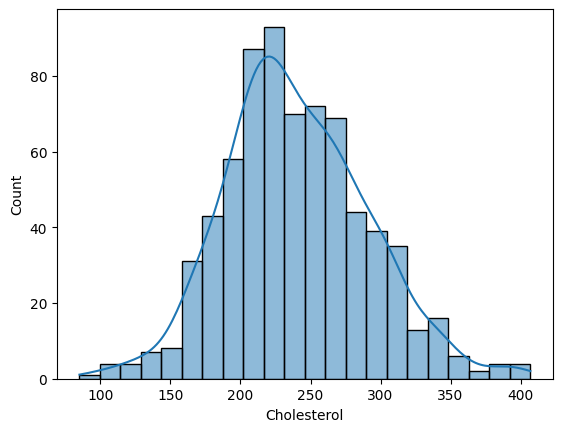

,Cholesterol
count,710.000000
mean,240.084507
std,51.002460
min,85.000000
25%,206.250000
50%,235.000000
75%,273.000000
max,407.000000


In [ ]:
sns.histplot(data=df, x='Cholesterol', kde=True)
plt.show()
df[['Cholesterol']].describe()

In [ ]:
print("jumlah data yang duplikat: ",df.duplicated().sum())

jumlah data yang duplikat:  0


### **4) Menentukan Objek Data**

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.276323     0.076366   0.243725 -0.398240  0.280905   
RestingBP     0.276323   1.000000     0.086159   0.174041 -0.136404  0.205683   
Cholesterol   0.076366   0.086159     1.000000   0.026574 -0.005031  0.078976   
FastingBS     0.243725   0.174041     0.026574   1.000000 -0.112921  0.045744   
MaxHR        -0.398240  -0.136404    -0.005031  -0.112921  1.000000 -0.265243   
Oldpeak       0.280905   0.205683     0.078976   0.045744 -0.265243  1.000000   
HeartDisease  0.310398   0.181511     0.103612   0.158822 -0.393352  0.503439   

              HeartDisease  
Age               0.310398  
RestingBP         0.181511  
Cholesterol       0.103612  
FastingBS         0.158822  
MaxHR            -0.393352  
Oldpeak           0.503439  
HeartDisease      1.000000  


<ipython-input-24-bac602c605ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
<ipython-input-24-bac602c605ae>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


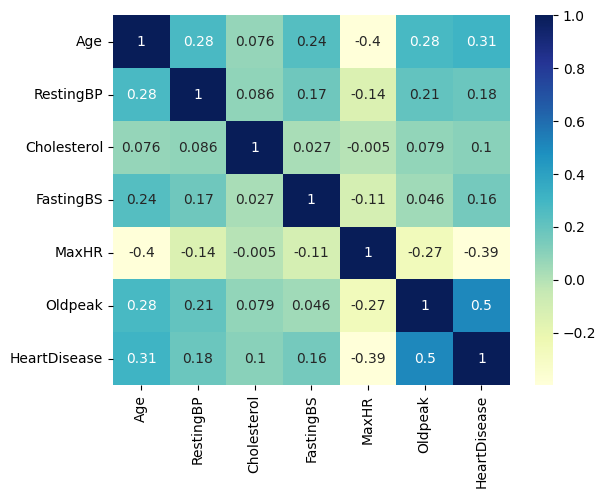

In [ ]:
print(df.corr())

# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

### **5) Mengkonstruksi Data**

In [ ]:
print(df.shape)
for col in catVar.columns:
    if col != 'HeartDisease':
        transformasi = pd.get_dummies(df[col], prefix='')
        df = pd.concat([df, transformasi], axis = 1)
        # Hapus Variabel Kategorik Awal, Sudah tidak diperlukan
        try:
            df.drop([col], axis=1, inplace=True)
        except Exception as err_:
            print(err_)
print(df.shape)
df.head()

(710, 12)
(710, 21)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,...,_NAP,_TA,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
0,54.0,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49.0,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37.0,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48.0,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54.0,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 0 to 917
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           710 non-null    float64
 1   RestingBP     710 non-null    int64  
 2   Cholesterol   710 non-null    int64  
 3   FastingBS     710 non-null    int64  
 4   MaxHR         710 non-null    int64  
 5   Oldpeak       710 non-null    float64
 6   HeartDisease  710 non-null    int64  
 7   _F            710 non-null    uint8  
 8   _M            710 non-null    uint8  
 9   _ASY          710 non-null    uint8  
 10  _ATA          710 non-null    uint8  
 11  _NAP          710 non-null    uint8  
 12  _TA           710 non-null    uint8  
 13  _LVH          710 non-null    uint8  
 14  _Normal       710 non-null    uint8  
 15  _ST           710 non-null    uint8  
 16  _N            710 non-null    uint8  
 17  _Y            710 non-null    uint8  
 18  _Down         710 non-null    

### **7) Menentukan Label Data**

In [ ]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,...,_NAP,_TA,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
0,54.0,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49.0,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37.0,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48.0,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54.0,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


#### Saving (preprocessed) Data

* Agar bisa digunakan saat pemodelan tanpa harus ulang preprocessing berkali-kali

In [ ]:
# Saving the preprocessed Data for future use/analysis
df.to_csv("data_PreProcessed.csv", encoding='utf8', index=False)

### **8) Membangun model**

In [ ]:
import time
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
file_ = 'data_PreProcessed.csv'
df = pd.read_csv(file_)

In [ ]:
predictor = df.loc[:, ~df.columns.isin(['HeartDisease'])]
target = df['HeartDisease']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.2, random_state=33)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(568, 20) (568,)
(142, 20) (142,)


### **Regresi Logistik dan Evaluasi Modelnya**

In [ ]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[60 12]
 [ 8 62]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        72
           1       0.84      0.89      0.86        70

    accuracy                           0.86       142
   macro avg       0.86      0.86      0.86       142
weighted avg       0.86      0.86      0.86       142



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **Interpretasi**

*   TP (True Positive): Ada 60 kasus di mana model memprediksi bahwa seseorang
menderita penyakit jantung dan mereka benar-benar menderita.
*   FP (False Positive): Ada 12 kasus di mana model memprediksi seseorang menderita penyakit jantung, namun sebenarnya mereka tidak menderita penyakit jantung.
*   FN (False Negative): Ada 8 kasus di mana model memprediksi seseorang tidak menderita penyakit jantung, padahal sebenarnya mereka menderita penyakit jantung.
*   TN (True Negative): Ada 62 kasus di mana model memprediksi bahwa seseorang tidak menderita penyakit jantung dan prediksinya benar.

Dengan melihat confussion matriks ini, model tampaknya memiliki kinerja yang cukup baik dalam memprediksi kasus penyakit jantung, dengan tingkat akurasi sekitar 86 %.

### Cross Validation (Untuk memeriksa kembali seberapa baik model yang kita miliki)

In [ ]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy Regresi Logistik: 0.86 (+/- 0.13), Waktu = 1.121 detik


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RegLog    0.732394
dtype: float64

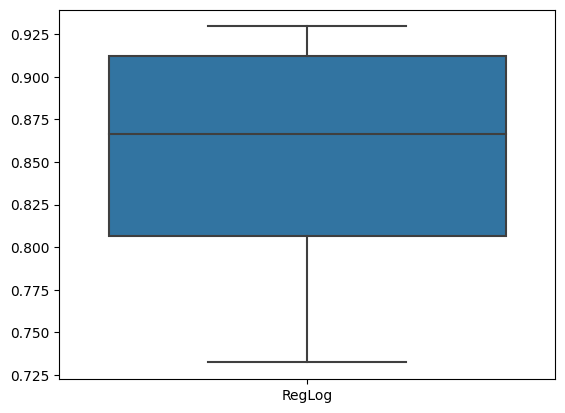

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

### **Decision Tree dan Evaluasi Modelnya**

In [ ]:
# Decision Tree
DT = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[62 10]
 [14 56]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        72
           1       0.85      0.80      0.82        70

    accuracy                           0.83       142
   macro avg       0.83      0.83      0.83       142
weighted avg       0.83      0.83      0.83       142



## **Interpretasi**

*   TP (True Positive): Ada 62 kasus di mana model memprediksi bahwa seseorang
menderita penyakit jantung dan mereka benar-benar menderita.
*   FP (False Positive): Ada 10 kasus di mana model memprediksi seseorang menderita penyakit jantung, namun sebenarnya mereka tidak menderita penyakit jantung.
*   FN (False Negative): Ada 14 kasus di mana model memprediksi seseorang tidak menderita penyakit jantung, padahal sebenarnya mereka menderita penyakit jantung.
*   TN (True Negative): Ada 56 kasus di mana model memprediksi bahwa seseorang tidak menderita penyakit jantung dan prediksinya benar.

Dengan melihat confussion matriks ini, model tampaknya memiliki kinerja yang cukup baik dalam memprediksi kasus penyakit jantung, dengan tingkat akurasi sekitar 83 %.

### Cross Validation (Untuk memeriksa kembali seberapa baik model yang kita miliki)

In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.80 (+/- 0.16), Waktu = 0.220 detik


RegLog     0.732394
DecTree    0.633803
dtype: float64

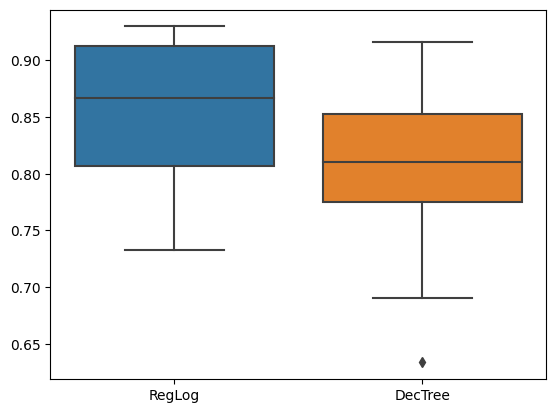

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

### Hyperparameter Optimization (Pada Model Decision Tree)


*   Mencari parameter optimal untuk meningkatkan accuracy


In [ ]:
# Optimal parameter Desion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(xTrain, yTrain)

print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.8450814536340852
{'max_depth': 3, 'criterion': 'gini'}
